In [1]:
import os
import utils
import numpy as np
from scipy.ndimage import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

image_id= '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552'
mask_path = utils.DATA_ROOT + "stage1_train/" + image_id + "/masks/"
mask_list = os.listdir(mask_path)
for i in range(len(mask_list)):
    if mask_list[i].endswith(".png"):
        tmp = imread(mask_path + mask_list[i])
        if i == 0:
            sum_pixels = tmp
        else:
            sum_pixels += tmp

In [3]:
print(np.sum(tmp>0) )
print(np.sum(tmp))
print(tmp.shape)

310
79050
(256, 256)


In [4]:
# whether objects are overlapped in this image
# if exist, then there will be pixels > 255 after all mask summarized
print(np.sum(sum_pixels>255)) # no overlap exists

0


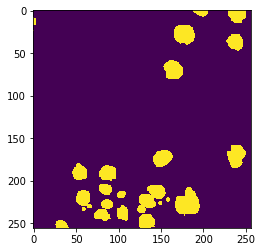

In [5]:
plt.imshow(sum_pixels) 

------------------------------------


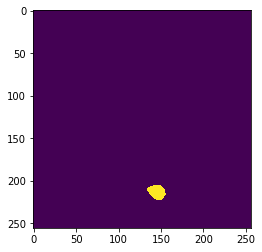

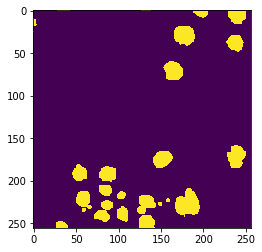

False
------------------------------------


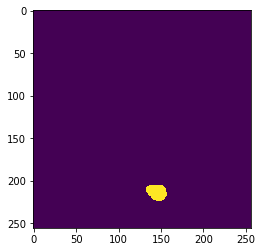

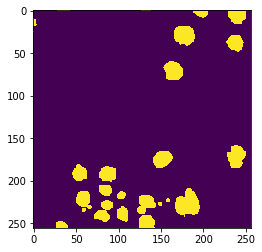

True


In [6]:
# Is there any object touch each other?
def obj2img(object_list, H, W):
    obj_runlength_concated = " ".join(object_list)
    img_np = utils.runlength_to_3D(obj_runlength_concated, H, W)
    return img_np

def mask_overlap(mask1, mask2):
    # make them have same mask value different background value
    # (mask1 == mask2).any(), check whether they have any intersection
    tmp1 = np.zeros_like(mask1)
    tmp1[mask1==255]=100
    tmp1[mask1==0]=1
    tmp2 = np.zeros_like(mask2)
    tmp2[mask2==255]=100
    tmp2[mask2==0]=2
    return (tmp1 == tmp2).any()

def expand1pixel(img):
    H, W, C = img.shape
    output_img = np.zeros((H, W, C))
    for h in range(H):
        for w in range(W):
            for c in range(C):
                if img[h, w, c] == 255 :
                    for h_new in range(max(h-1,0), min(h+2,H)):
                        for w_new in range(max(w-1,0), min(w+2,W)):
                            if output_img[h_new, w_new, c] != 255:
                                output_img[h_new, w_new, c] = 255
    return output_img

def expand2pixel(img):
    H, W, C = img.shape
    output_img = np.zeros((H, W, C))
    for h in range(H):
        for w in range(W):
            for c in range(C):
                if img[h, w, c] == 255 :
                    for h_new in range(max(h-5,0), min(h+6,H)):
                        for w_new in range(max(w-5,0), min(w+6,W)):
                            if output_img[h_new, w_new, c] != 255:
                                output_img[h_new, w_new, c] = 255
    return output_img

obj_list = utils.obj_select(image_id)
obj_idx = 15
origin_img = utils.image2ndarry(image_id, "train")
H, W, _ = origin_img.shape
obj = [obj_list[obj_idx]]
else_obj = [obj_list[i] for i in range(len(obj_list)) if i != obj_idx]
obj_img = obj2img(obj,H, W)
else_obj_img  = obj2img(else_obj,H, W)
# is there any overlap?
print("------------------------------------")
plt.imshow(obj_img[:,:,0])
plt.show()
plt.imshow(else_obj_img[:,:,0]) 
plt.show()
print(mask_overlap(obj_img[:,:,0], else_obj_img[:,:,0]))
# if expand the object's border one pixel, any overlap?
expand1_img = expand1pixel(obj_img)
print("------------------------------------")
plt.imshow(expand1_img[:,:,0])
plt.show()
plt.imshow(else_obj_img[:,:,0]) 
plt.show()
print(mask_overlap(expand1_img[:,:,0], else_obj_img[:,:,0]))

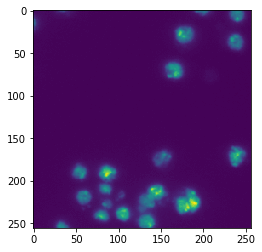

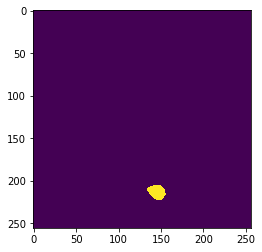

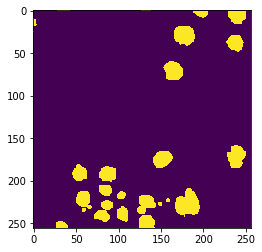

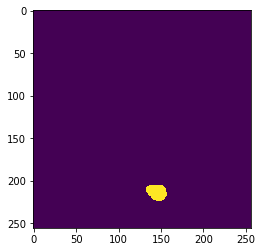

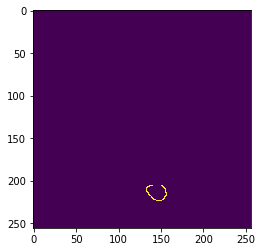

In [101]:
plt.imshow(origin_img[:,:,0]) 
plt.show()
plt.imshow(obj_img[:,:,0])
plt.show()
plt.imshow(else_obj_img[:,:,0]) 
plt.show()
plt.imshow(expand1_img[:,:,0])
plt.show()
plt.imshow((expand1_img-obj_img)[:,:,0])
plt.show()

In [6]:
# whether label mask image == label run-length encoding data ?
origin = imread(utils.TRAIN_DIR + image_id + ".png")
H, W, _ = origin.shape
mask_img = utils.mask2ndarry(image_id, H, W)

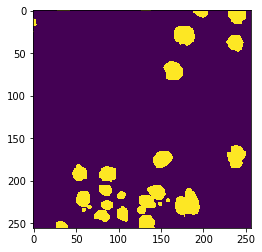

In [7]:
plt.imshow(mask_img[:,:,0])